In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates=["date"], index_col="date")
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [3]:
df = df[(df['value'] >= df['value'].quantile(0.025))
        & (df['value'] <= df['value'].quantile(0.975))]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


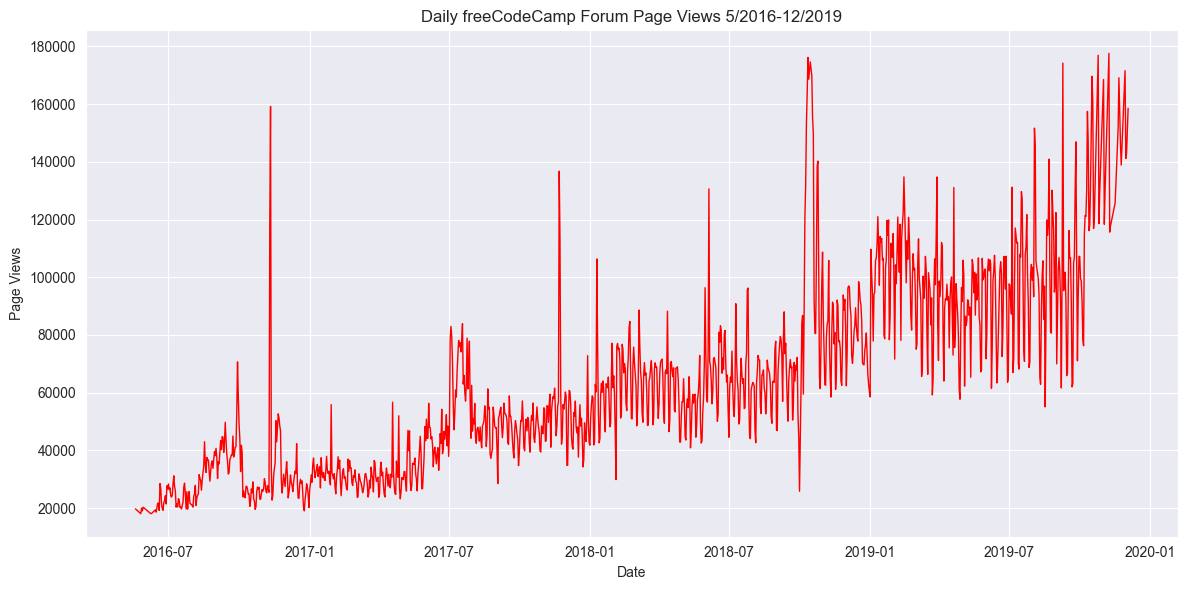

In [4]:
fig = plt.figure(figsize=(12, 6))
plt.plot(df.index, df['value'], color='r', linewidth=1)
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.tight_layout()
plt.show()

#fig.savefig('line_plot.png')

C:\Users\hamza\AppData\Local\Temp\ipykernel_9720\852591167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df.index.year
C:\Users\hamza\AppData\Local\Temp\ipykernel_9720\852591167.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df.index.strftime('%B')


<Figure size 1000x600 with 0 Axes>

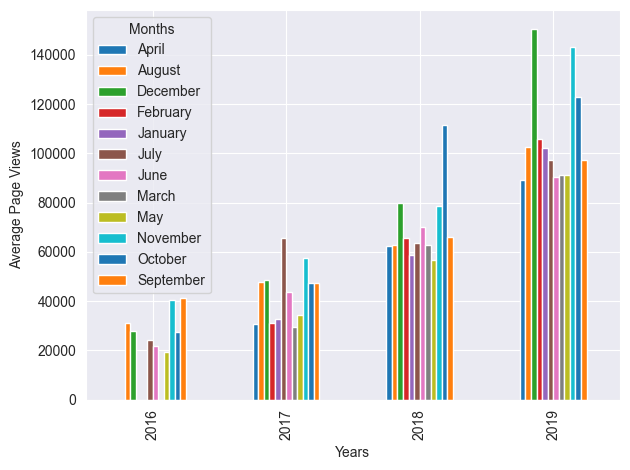

In [5]:
df['Year'] = df.index.year
df['Month'] = df.index.strftime('%B')
df_bar = df.groupby(['Year', 'Month'])['value'].mean().unstack()
fig = plt.figure(figsize=(10, 6))
df_bar.plot(kind='bar')
plt.xlabel('Years')
plt.ylabel('Average Page Views')
plt.legend(title='Months')
plt.xticks(rotation=90)
plt.tight_layout()

#fig.savefig('bar_plot.png')

In [6]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['Year'] = [d.year for d in df_box['date']]
df_box['Month'] = [d.strftime('%b') for d in df_box['date']]

C:\Users\hamza\AppData\Local\Temp\ipykernel_9720\650481139.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Year', y='value', data=df_box, ax=axes[0], palette='Set3')
C:\Users\hamza\AppData\Local\Temp\ipykernel_9720\650481139.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='value', data=df_box, ax=axes[1], order=[


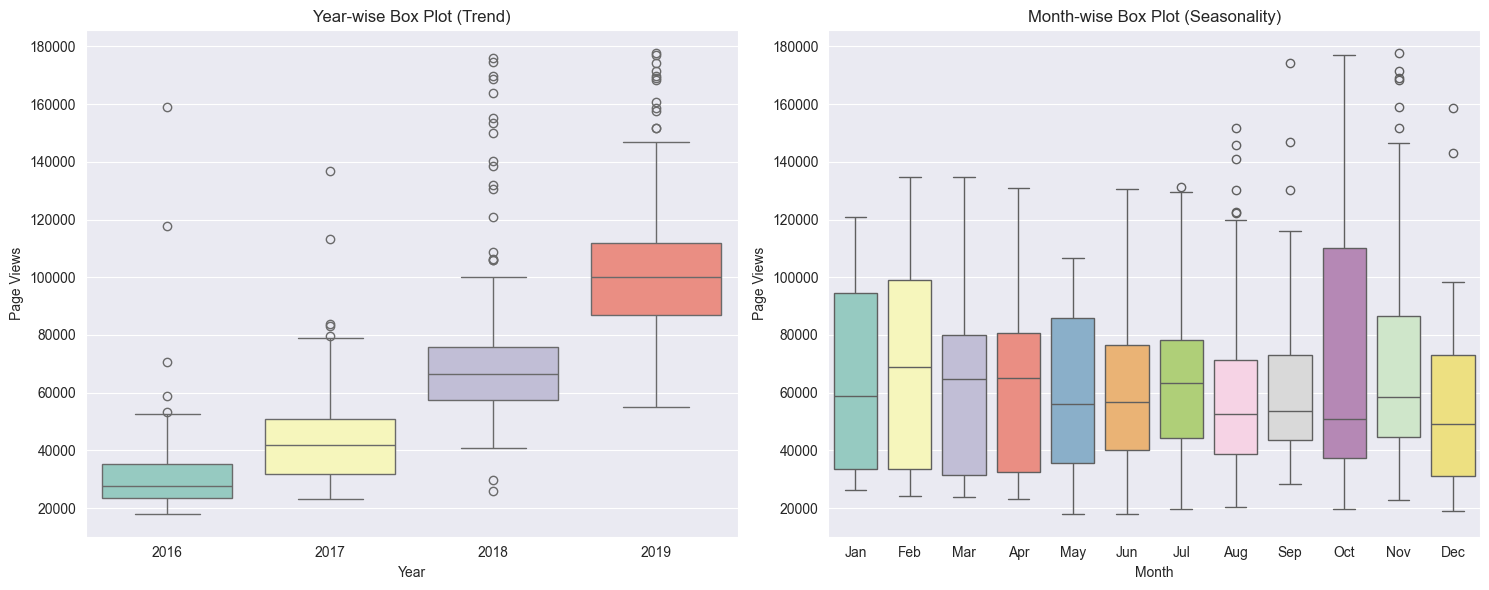

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(x='Year', y='value', data=df_box, ax=axes[0], palette='Set3')
axes[0].set_title('Year-wise Box Plot (Trend)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Page Views')

sns.boxplot(x='Month', y='value', data=df_box, ax=axes[1], order=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
], palette='Set3')
axes[1].set_title('Month-wise Box Plot (Seasonality)')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Page Views')

plt.tight_layout()

#fig.savefig('box_plot.png')